In [10]:
import matplotlib.pyplot as plt
import numpy as np
import math

# state of system [x, y, vx, vy, ax, ay]
def get_state(current_state, dt):
    old_x = current_state[0]
    old_y = current_state[1]
    old_vx = current_state[2]
    old_vy = current_state[3]
    old_ax = current_state[4]
    old_ay = current_state[5]

    # calculate x, y
    x = old_x + old_vx*dt+.5*old_ax*dt*dt
    y = old_y + old_vy*dt+.5*old_ay*dt*dt

    # calculate vx, vy
    vx = old_vx + old_ax*dt
    vy = old_vy + old_ay*dt

    return [x, y, vx, vy, old_ax, old_ay]

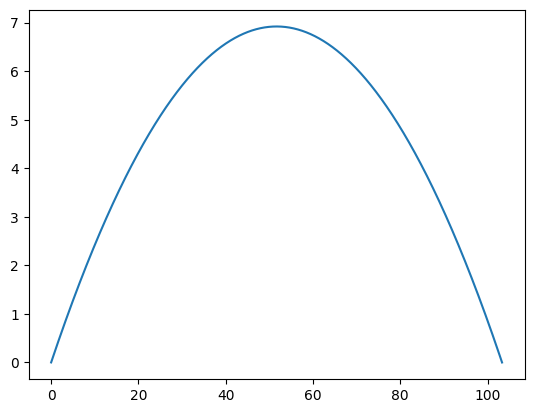

In [11]:
v0 = 45 # m/s
theta = 15 # degrees
x = 0 # meters
y = 0 # meters
dt = 0.001 # seconds

vx = v0*math.cos(theta*math.pi/180)
vy = v0*math.sin(theta*math.pi/180)
ax = 0
ay = -9.8

x_points = [x]
y_points = [y]

state = [x, y, vx, vy, ax, ay]

while y >= 0:
    state = get_state(state, dt)
    x_points.append(state[0])
    y = state[1]
    y_points.append(y)

plt.plot(x_points, y_points)

In [14]:
def get_state_with_drag(current_state, K, dt):
    old_x = current_state[0]
    old_y = current_state[1]
    old_vx = current_state[2]
    old_vy = current_state[3]
    old_ax = current_state[4]
    old_ay = current_state[5]

    v = np.sqrt(old_vx * old_vx + old_vy * old_vy)

    # calculate x, y
    x = old_x + old_vx*dt+.5*old_ax*dt*dt
    y = old_y + old_vy*dt+.5*old_ay*dt*dt

    # calculate vx, vy
    vx = old_vx + old_ax*dt
    vy = old_vy + old_ay*dt

    # calculating ax, ay
    ax = -K * v * old_vx
    ay = -K * v * old_vy - 9.8

    return [x, y, vx, vy, ax, ay]

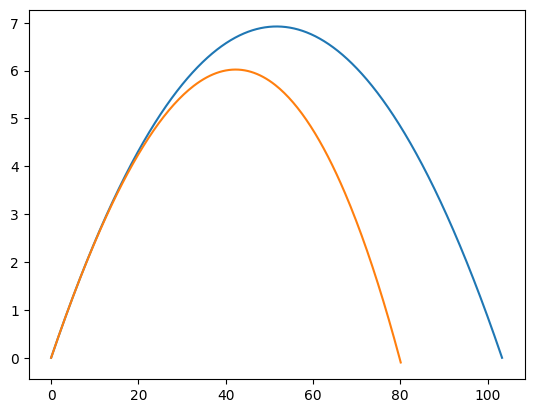

In [17]:
v0 = 45 # m/s
theta = 15 # degrees
x = 0 # meters
y = 0 # meters
dt = 0.01 # seconds
mass = 2 # kg
c_drag = 0.47 # ball drag coefficient
density = 1.2 # kg/m^3
radius = 0.1 # radius of the ball
area = math.pi * radius * radius # cross-sectional area of ball (area of circle)
K = c_drag * area * density / (2 * mass) # constant K with mass

vx = v0*math.cos(theta*math.pi/180)
vy = v0*math.sin(theta*math.pi/180)

xd_points = [x]
yd_points = [y]

ax = -K * v0 * vx
ay = -K * v0 * vy -9.8

state = [x, y, vx, vy, ax, ay]

while y >= 0:
    state = get_state_with_drag(state, K, dt)
    xd_points.append(state[0])
    y = state[1]
    yd_points.append(y)

plt.plot(x_points, y_points, xd_points, yd_points)